In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [41]:
import matplotlib.image as mimg
import numpy as np
import matplotlib.pyplot as plt
total_samples = 410
data = np.zeros((total_samples,112*92))
label = np.zeros((total_samples))
images = np.zeros((total_samples,112,92))

index = -1
for i in range(1,42,1):
  for j in range(1,11,1):
    user_id = i
    samp_no = j
    index = index + 1
    path = "/gdrive/MyDrive/AI_Summer_Training/orl_face/u%d/%d.png"%(user_id, samp_no)

    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[index,:] = feat
    label[index] = i
    images[index,:,:] = im

print(images.shape)

(410, 112, 92)


In [42]:
from sklearn import svm,model_selection,metrics
import numpy as np

x = data
y = label

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)

img_model = svm.SVC(kernel='linear', gamma="scale",C=1)
img_model = img_model.fit(xtrain,ytrain)
ypred = img_model.predict(xtest)

accSVM = metrics.accuracy_score(ypred,ytest)
print('Accuracy(SVM): ',accSVM)

Accuracy(SVM):  0.983739837398374


In [43]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
path = '/gdrive/MyDrive/AI_Summer_Training/orl_face/u41/2.png'
im = mimg.imread(path)
print(im.max())

0.85882354


In [44]:
import numpy as np
import cv2
data_nn = np.zeros((410,112,92))
label_nn = np.zeros(410)
count = 0
for i in range(1,42,1):
  for j in range(1,11,1):
    path = '/gdrive/MyDrive/AI_Summer_Training/orl_face/u%d/%d.png'%(i,j)
    im = mimg.imread(path)
    data_nn[count,:,:] = im
    label_nn[count] = i
    count+=1

print(data.shape,label.shape)

(410, 10304) (410,)


In [45]:
from sklearn import model_selection
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data_nn,label_nn,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

face_model = keras.Sequential()
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dropout(0.2))
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dropout(0.5))
#output layer
face_model.add(keras.layers.Dense(42,activation='relu'))

#add optimizer
face_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())

(287, 112, 92) (287,)
(123, 112, 92) (123,)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 10304)             0         
                                                                 
 dense_32 (Dense)            (None, 128)               1319040   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 42)                5418      
                                                                 
Total par

In [46]:
face_model.fit(xtrain, ytrain, epochs=300, validation_data=(xtest, ytest))

Epoch 1/300
9/9 [==============================] - 1s 36ms/step - loss: 3.8029 - accuracy: 0.0209 - val_loss: 3.7559 - val_accuracy: 0.0407
Epoch 2/300
9/9 [==============================] - 0s 14ms/step - loss: 3.7244 - accuracy: 0.0418 - val_loss: 3.7155 - val_accuracy: 0.0569
Epoch 3/300
9/9 [==============================] - 0s 16ms/step - loss: 3.7504 - accuracy: 0.0139 - val_loss: 3.7248 - val_accuracy: 0.0081
Epoch 4/300
9/9 [==============================] - 0s 15ms/step - loss: 3.7162 - accuracy: 0.0418 - val_loss: 3.7016 - val_accuracy: 0.0569
Epoch 5/300
9/9 [==============================] - 0s 14ms/step - loss: 3.7146 - accuracy: 0.0314 - val_loss: 3.7024 - val_accuracy: 0.0813
Epoch 6/300
9/9 [==============================] - 0s 14ms/step - loss: 3.7167 - accuracy: 0.0348 - val_loss: 3.7056 - val_accuracy: 0.0488
Epoch 7/300
9/9 [==============================] - 0s 18ms/step - loss: 3.7016 - accuracy: 0.0557 - val_loss: 3.6957 - val_accuracy: 0.0488
Epoch 8/300
9/9 [===

In [47]:
[lossNN, accNN] = face_model.evaluate(xtest, ytest)
print(f"Accuracy(NN): {accNN}")


4/4 [==============================] - 0s 8ms/step - loss: 0.2940 - accuracy: 0.9268
Accuracy(NN): 0.9268292784690857


In [23]:
import numpy as np
import matplotlib.image as mimg
import cv2
data_cnn = np.zeros((410,32,32))
label_cnn = np.zeros(410)
count = 0
for i in range(1,42,1):
  for j in range(1,11,1):
    path = '/gdrive/MyDrive/AI_Summer_Training/orl_face/u%d/%d.png'%(i,j)
    im = mimg.imread(path)
    im = cv2.resize(im,(32,32))
    data_cnn[count,:,:] = im
    label_cnn[count] = i-1
    count+=1

print(data_cnn.shape,label_cnn.shape)
print(np.unique(label_cnn))

(410, 32, 32) (410,)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40.]


In [37]:
from tensorflow import keras
from sklearn import model_selection
import numpy as np

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data_cnn,label_cnn,test_size=0.3)
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(16,3,activation='relu',input_shape=(32,32,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# # Convolutinal layer 2
# cnn_model.add(keras.layers.Conv2D(32,3,activation='relu'))
# # maxpooling -2
# cnn_model.add(keras.layers.MaxPool2D((2,2)))


# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(128,activation='relu')) # HL1
cnn_model.add(keras.layers.Dropout(0.5)) # dropout
cnn_model.add(keras.layers.Dense(41)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='SGD',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 30, 30, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 3600)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               460928    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 41)                5289      
                                                     

In [38]:
history = cnn_model.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest))

Epoch 1/300
9/9 [==============================] - 1s 40ms/step - loss: 3.7345 - accuracy: 0.0070 - val_loss: 3.7176 - val_accuracy: 0.0488
Epoch 2/300
9/9 [==============================] - 0s 19ms/step - loss: 3.7047 - accuracy: 0.0279 - val_loss: 3.7191 - val_accuracy: 0.0488
Epoch 3/300
9/9 [==============================] - 0s 23ms/step - loss: 3.7120 - accuracy: 0.0314 - val_loss: 3.7196 - val_accuracy: 0.0488
Epoch 4/300
9/9 [==============================] - 0s 19ms/step - loss: 3.7067 - accuracy: 0.0105 - val_loss: 3.7215 - val_accuracy: 0.0407
Epoch 5/300
9/9 [==============================] - 0s 18ms/step - loss: 3.7061 - accuracy: 0.0314 - val_loss: 3.7220 - val_accuracy: 0.0325
Epoch 6/300
9/9 [==============================] - 0s 23ms/step - loss: 3.6959 - accuracy: 0.0418 - val_loss: 3.7231 - val_accuracy: 0.0325
Epoch 7/300
9/9 [==============================] - 0s 19ms/step - loss: 3.6877 - accuracy: 0.0418 - val_loss: 3.7258 - val_accuracy: 0.0325
Epoch 8/300
9/9 [===

In [39]:
[lossCNN, accCNN] = cnn_model.evaluate(xtest, ytest)
print(f"Accuracy(CNN): {accCNN}")


4/4 [==============================] - 0s 6ms/step - loss: 0.1107 - accuracy: 0.9837
Accuracy(CNN): 0.9837398529052734


In [48]:
print('Accuracy(SVM): ',accSVM)
print(f"Accuracy(NN): {accNN}")
print(f"Accuracy(CNN): {accCNN}")

Accuracy(SVM):  0.983739837398374
Accuracy(NN): 0.9268292784690857
Accuracy(CNN): 0.9837398529052734


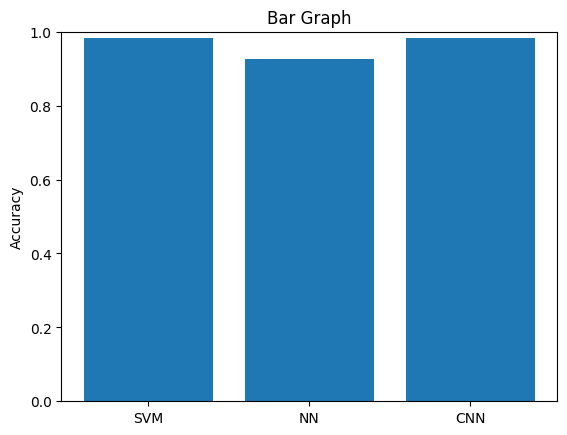

In [49]:
import matplotlib.pyplot as plt
import numpy as np

values = [accSVM, accNN, accCNN]

plt.bar(np.arange(len(values)), values)
plt.xticks(np.arange(len(values)), ['SVM', 'NN', 'CNN'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Bar Graph')
plt.show()